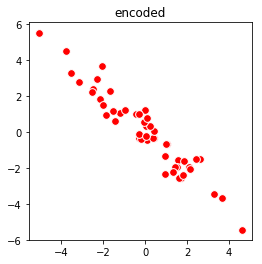

In [4]:
from autograd import numpy as np
from autograd import grad
import matplotlib.pyplot as plt

datapath = 'datasets/'
csvname = datapath + '2d_span_data_centered.csv'
# load in dataset
X = np.loadtxt(csvname,delimiter = ',')
# plot dataset
#figure = plt.figure(figsize = (4,4))
#plt.scatter(X[0,:],X[1,:],s=60,c='k',edgecolor='w')
#plt.show()

def square_cost(w):
    encoder = np.dot(X.T,w)
    #decoder = np.dot(w,encoder)
    wp = np.dot(c,encoder.T)
    cost = np.sum(np.square(wp - X))
    return cost / float(X.shape[1])

def gradient_descent(g,alpha,max_its,w):
    # compute gradient module using autograd
    gradient = grad(g)

    # run the gradient descent loop
    weight_history = [w] # weight history container
    cost_history = [g(w)] # cost function history container
    for k in range(max_its):
        # evaluate the gradient
        grad_eval = gradient(w)
        # take gradient descent step
        w = w - alpha*grad_eval
        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history,cost_history
weights = np.random.rand(2,2)
c = np.array([[2,1],[1,2]])

alpha = 0.001
max_its = 100
weight_his,cost_his = gradient_descent(square_cost,alpha,max_its,weights)

final_w = weight_his[-1]
encoder = np.dot(X.T,final_w).T
# plot dataset
figure = plt.figure(figsize = (4,4))
plt.scatter(encoder[0],encoder[1],s=60,c='r',edgecolor='w')
plt.title("encoded")
plt.show()   